In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [65]:
#importing and reading the dataset
data = pd.read_csv("AAPL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [66]:
#This is to check how many rows we have
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10463,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
10464,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
10465,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
10466,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900
10467,2022-06-17,130.070007,133.080002,129.809998,131.559998,131.559998,134118500


In [67]:
#To know the size of the dataset
data.shape

(10468, 7)

In [68]:
#describing the data which gives descriptive information about the data
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [69]:
#which gives information about the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [70]:
#As Date is in object formart it would be be difficult when visualising and model building, so we are converting it into Date format
data["Date"] = pd.to_datetime(data["Date"])

In [71]:
#Checking if we have any null values
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [72]:
#Checking if we have any duplicate values
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows exist.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicate rows exist.


In [73]:
#creating a new dataframe using data and setting Date as index so that it will become easy while visualizing
data1 = data.set_index("Date")
data1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


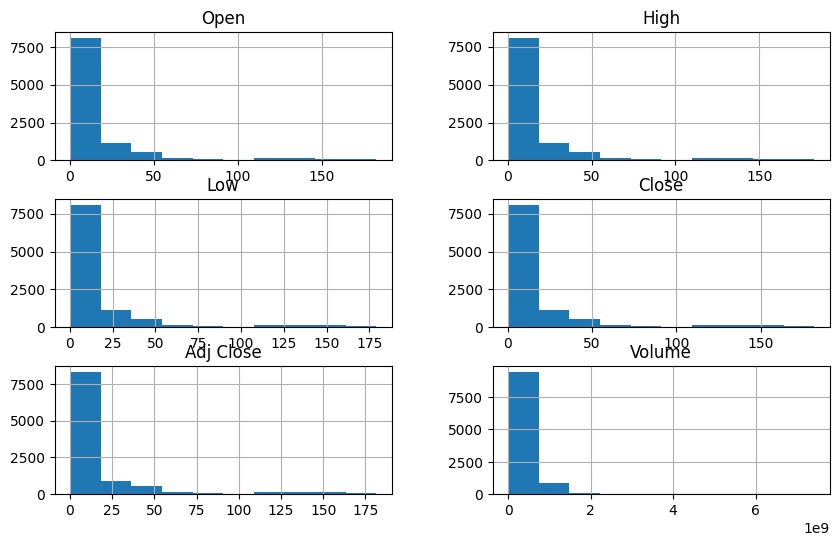

In [74]:
#Histogram
data1.hist(figsize=(10,6))
plt.show()

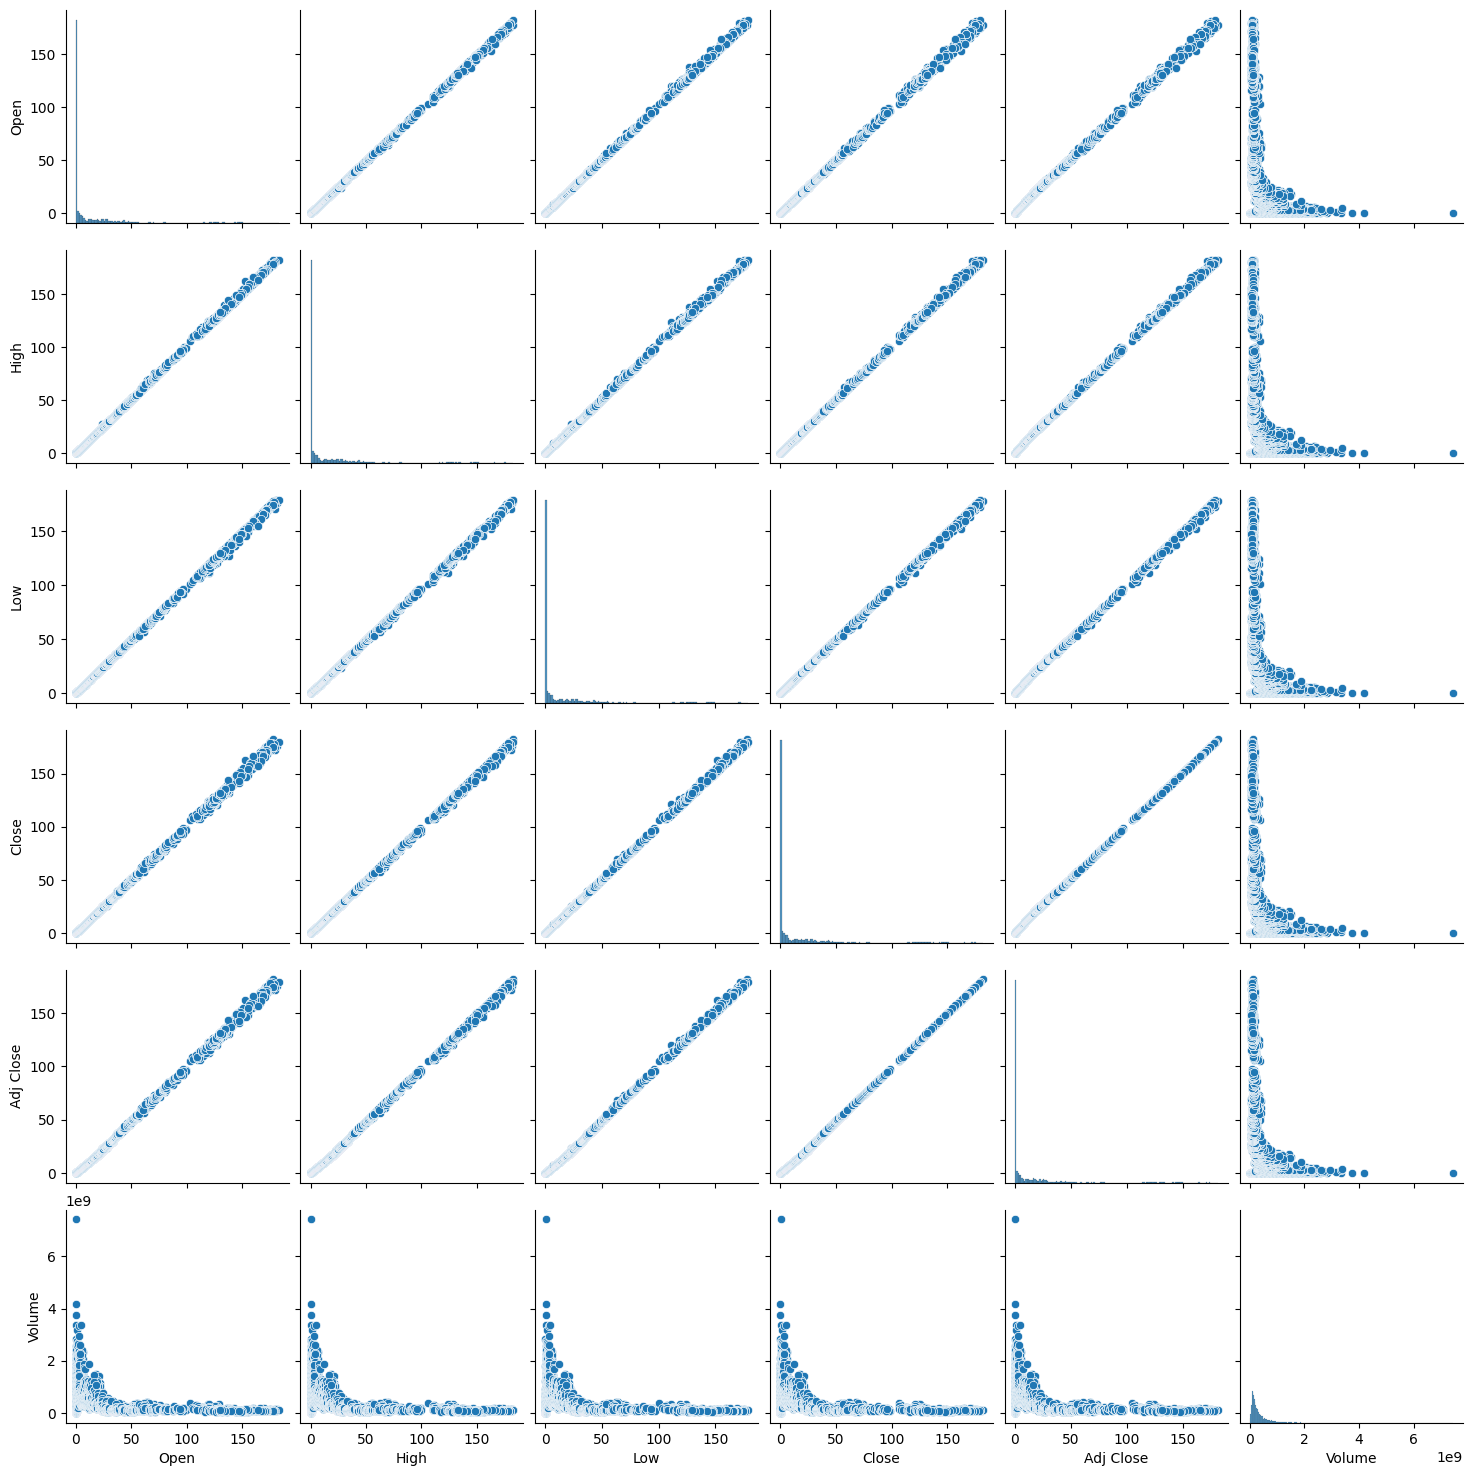

In [75]:
#checking the correlation
correlation = sns.pairplot(data1)

In [76]:
#generating a correlation matrix 
correlation_matrix = data1.corr(method="pearson")
correlation_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999943,0.999924,0.999850,0.999516,-0.196211
High,0.999943,1.000000,0.999908,0.999924,0.999618,-0.195635
Low,0.999924,0.999908,1.000000,0.999928,0.999575,-0.197150
Close,0.999850,0.999924,0.999928,1.000000,0.999671,-0.196411
Adj Close,0.999516,0.999618,0.999575,0.999671,1.000000,-0.199262
Volume,-0.196211,-0.195635,-0.197150,-0.196411,-0.199262,1.000000


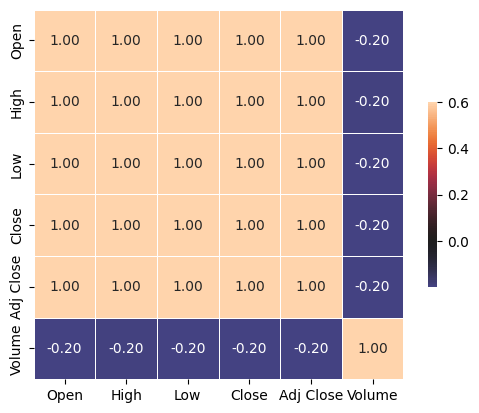

In [77]:
#heatmap to show the the correlation in visualisation format
heatmap = sns.heatmap(
    correlation_matrix,
    vmax=0.6,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
    fmt="0.2f",
)
plt.show()

<Axes: xlabel='Date'>

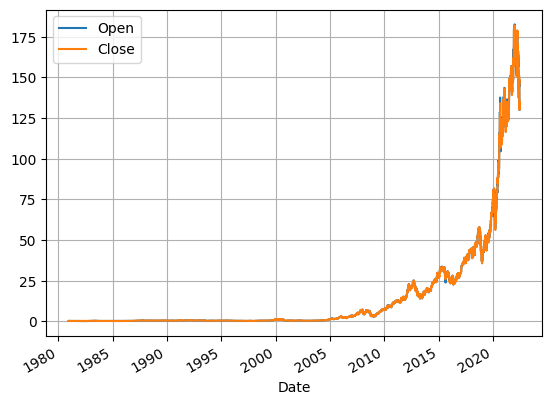

In [78]:
#plotting this to see the trend
data1[["Open", "Close"]].plot(grid=True)

<Axes: xlabel='Date'>

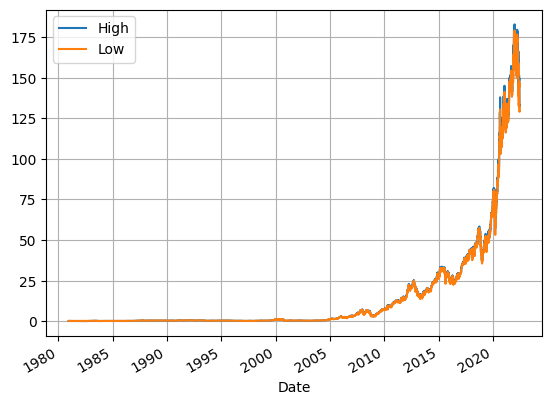

In [79]:
#plotting this to see the trend
data1[["High", "Low"]].plot(grid=True)

<Axes: xlabel='Date'>

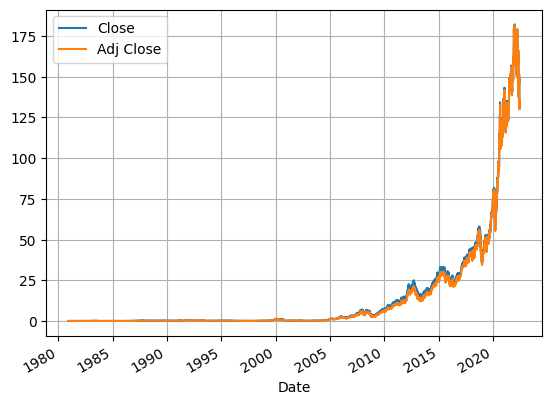

In [80]:
#plotting this to see the trend
data1[["Close", "Adj Close"]].plot(grid=True)

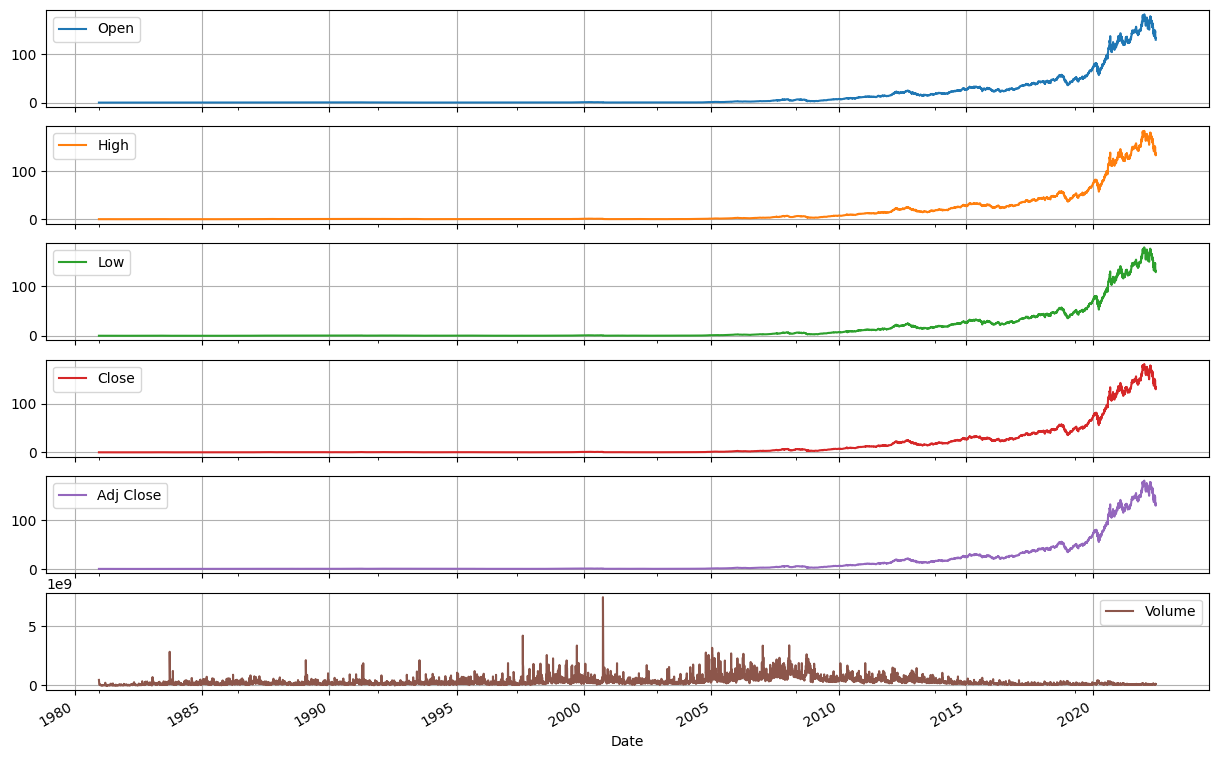

In [81]:
data1.plot(subplots=True, figsize=(15,10), grid=True)
plt.show()

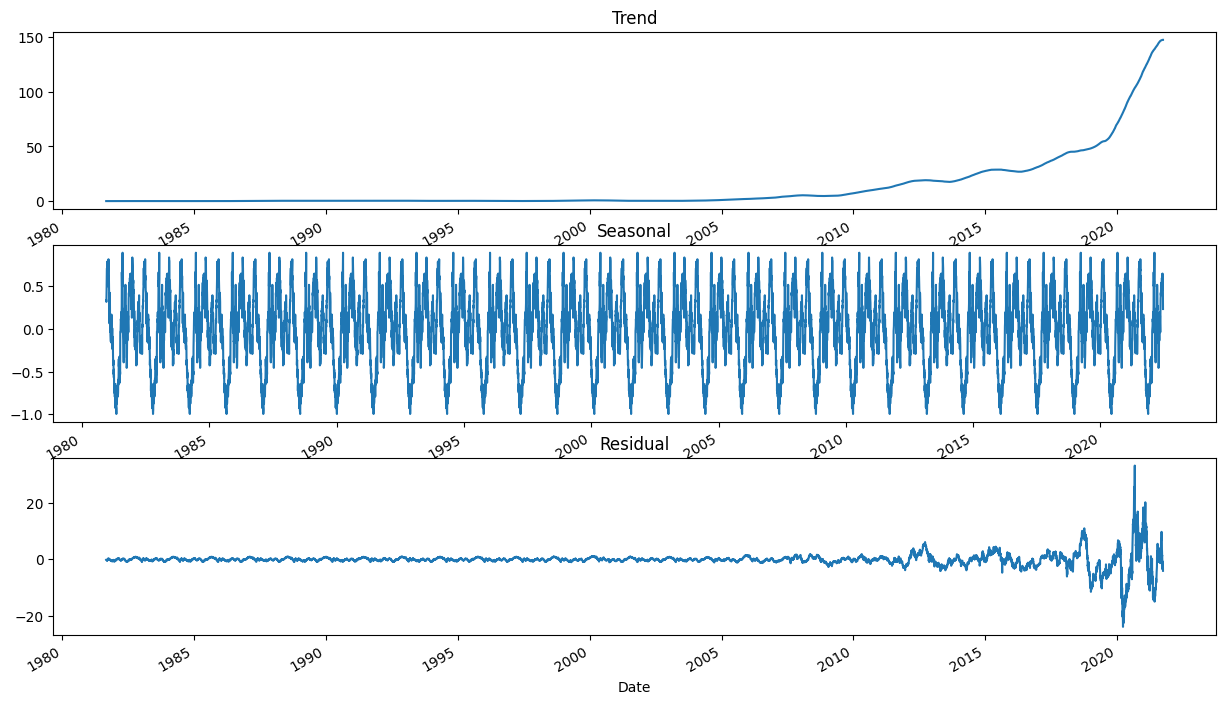

In [82]:
#Decomposing the data
residual = sm.tsa.seasonal_decompose(data1["Open"], model="additive", period=365)    # using yearly frequency

plt.figure(figsize=(15, 12))

plt.subplot(411)
residual.trend.plot()
plt.title("Trend")

plt.subplot(412)
residual.seasonal.plot()
plt.title("Seasonal")

plt.subplot(413)
residual.resid.plot()
plt.title("Residual")

plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

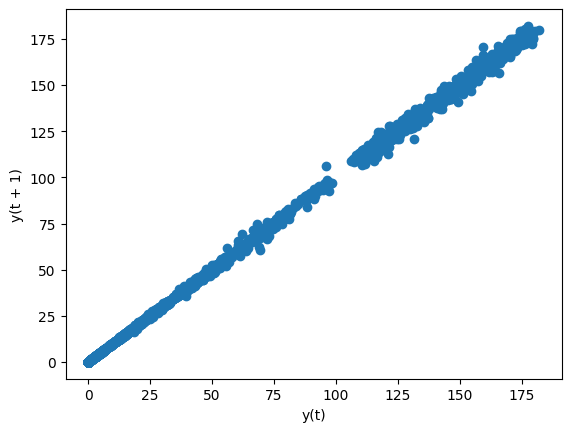

In [83]:
#Checking the Lag in the Closing Price for 1 day
pd.plotting.lag_plot(data1["Close"], lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 7)'>

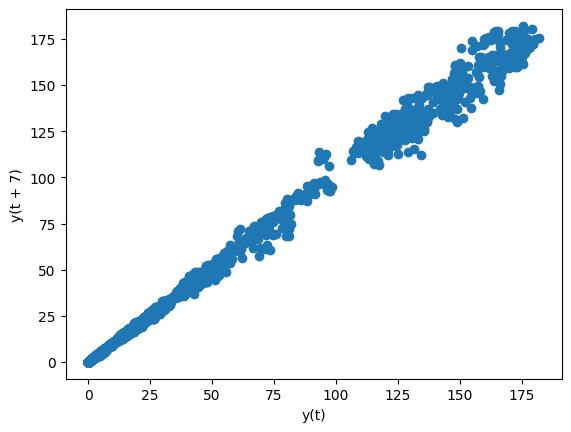

In [84]:
#Checking the Lag in the Closing Price for 7 days
pd.plotting.lag_plot(data1["Close"], lag=7)

<Axes: xlabel='y(t)', ylabel='y(t + 30)'>

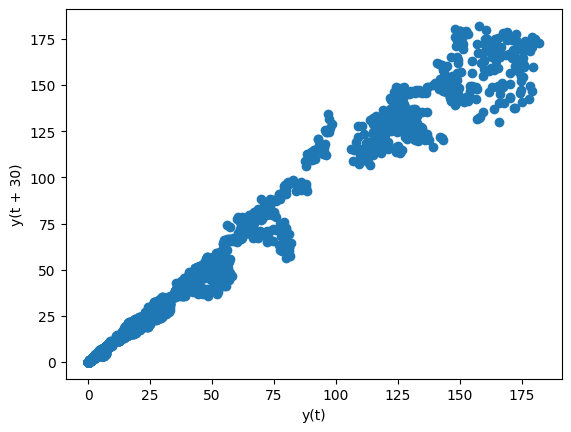

In [85]:
#Checking the Lag in the Closing Price for 30 days
pd.plotting.lag_plot(data1["Close"], lag=30)

<Axes: xlabel='y(t)', ylabel='y(t + 180)'>

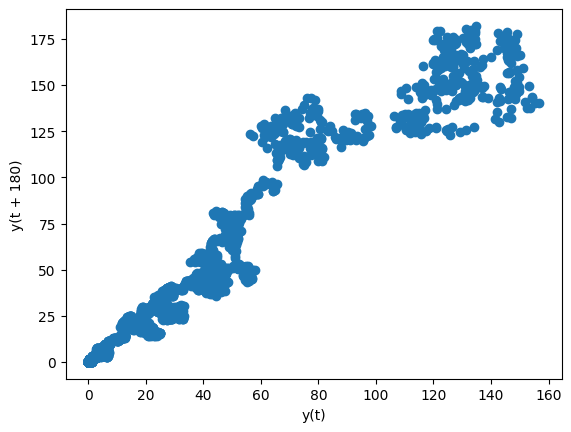

In [86]:
#Checking the Lag in the Closing Price for 6 months
pd.plotting.lag_plot(data1["Close"], lag=180)

In [87]:
#Model building
#Moving Average Model
data_base = data1[["Close"]]
data_base.head()

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


In [88]:
data_base["MA_Rolling_3"] =  data_base["Close"].rolling(window=3).mean()

In [89]:
data_base.tail(20)

,Close,MA_Rolling_3
Date,,
2022-05-20,137.589996,138.586670
2022-05-23,143.110001,139.350001
2022-05-24,140.360001,140.353333
2022-05-25,140.520004,141.330002
2022-05-26,143.779999,141.553335
2022-05-27,149.639999,144.646667
2022-05-31,148.839996,147.419998
2022-06-01,148.710007,149.063334
2022-06-02,151.210007,149.586670


<Axes: xlabel='Date'>

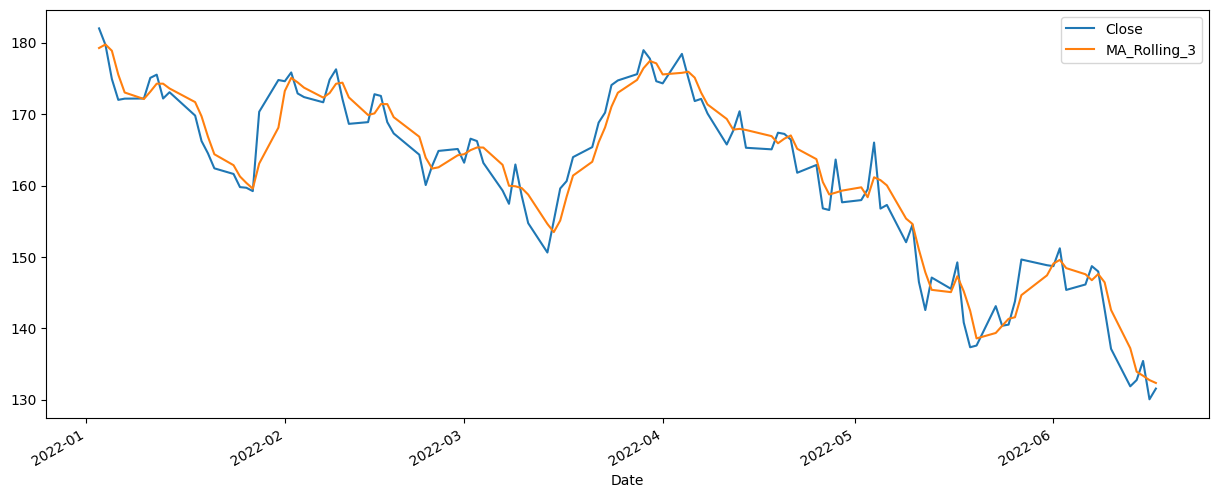

In [90]:
#plotting for a smaller time period to show clear visualization
data_base["2022":"2022"].plot(figsize=(15,6))

In [91]:
#Weighted Moving Average
#Function for moving average
def calc_wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [92]:
#weights sum up to a window size
data_base["WMA_Rolling_3"] = data_base["Close"].rolling(window=3).apply(calc_wma(np.array([0.5, 1, 1.5]))) 
data_base.head()

,Close,MA_Rolling_3,WMA_Rolling_3
Date,,,
1980-12-12,0.128348,NaN,NaN
1980-12-15,0.121652,NaN,NaN
1980-12-16,0.112723,0.120908,0.118304
1980-12-17,0.115513,0.116629,0.115606
1980-12-18,0.118862,0.115699,0.116722


<Axes: xlabel='Date'>

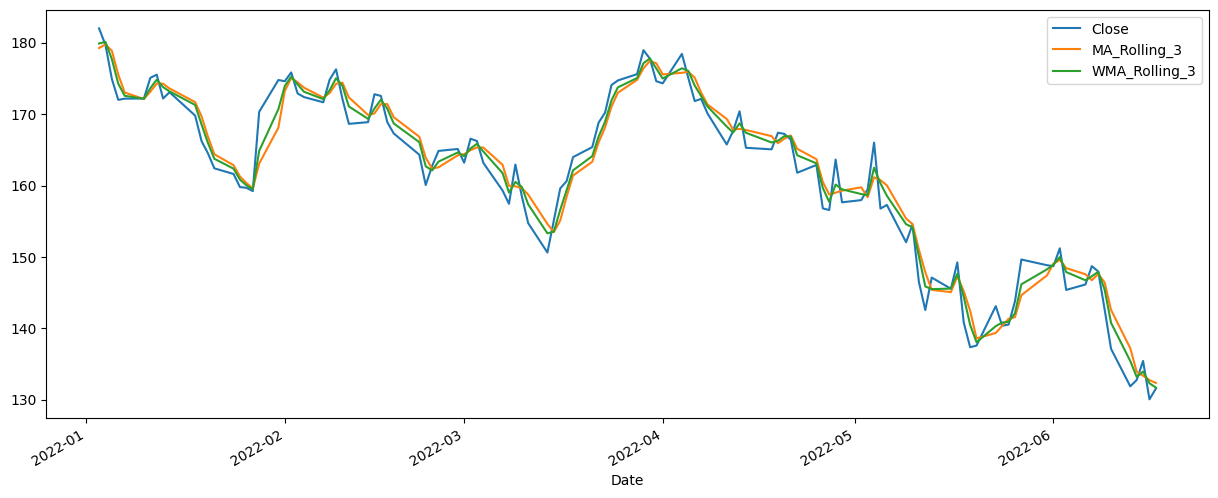

In [93]:
#plotting for a smaller time period to show clear visualization
data_base["2022":"2022"].plot(figsize=(15,6))

In [94]:
#Exponential Moving Average
data_base["EMA_Rolling_3"] = data_base["Close"].ewm(span=3, adjust=False, min_periods=0).mean()
data_base.head()

,Close,MA_Rolling_3,WMA_Rolling_3,EMA_Rolling_3
Date,,,,
1980-12-12,0.128348,NaN,NaN,0.128348
1980-12-15,0.121652,NaN,NaN,0.125000
1980-12-16,0.112723,0.120908,0.118304,0.118862
1980-12-17,0.115513,0.116629,0.115606,0.117187
1980-12-18,0.118862,0.115699,0.116722,0.118025


<Axes: xlabel='Date'>

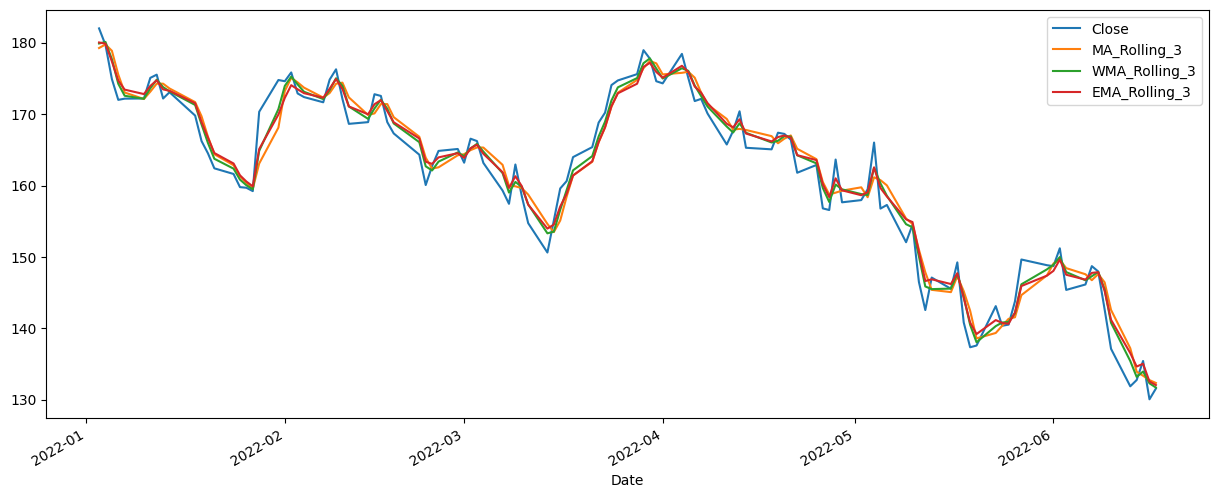

In [95]:
#plotting for a smaller time period to show clear visualization
data_base["2022":"2022"].plot(figsize=(15,6))

In [96]:
#EXPONENTIAL SMOOTHING AVERAGE
data_base["SEMA_Rolling_3"] = data_base["Close"].ewm(alpha=0.7, adjust=False, min_periods=3).mean()
data_base.head()

,Close,MA_Rolling_3,WMA_Rolling_3,EMA_Rolling_3,SEMA_Rolling_3
Date,,,,,
1980-12-12,0.128348,NaN,NaN,0.128348,NaN
1980-12-15,0.121652,NaN,NaN,0.125000,NaN
1980-12-16,0.112723,0.120908,0.118304,0.118862,0.116004
1980-12-17,0.115513,0.116629,0.115606,0.117187,0.115660
1980-12-18,0.118862,0.115699,0.116722,0.118025,0.117902


<Axes: xlabel='Date'>

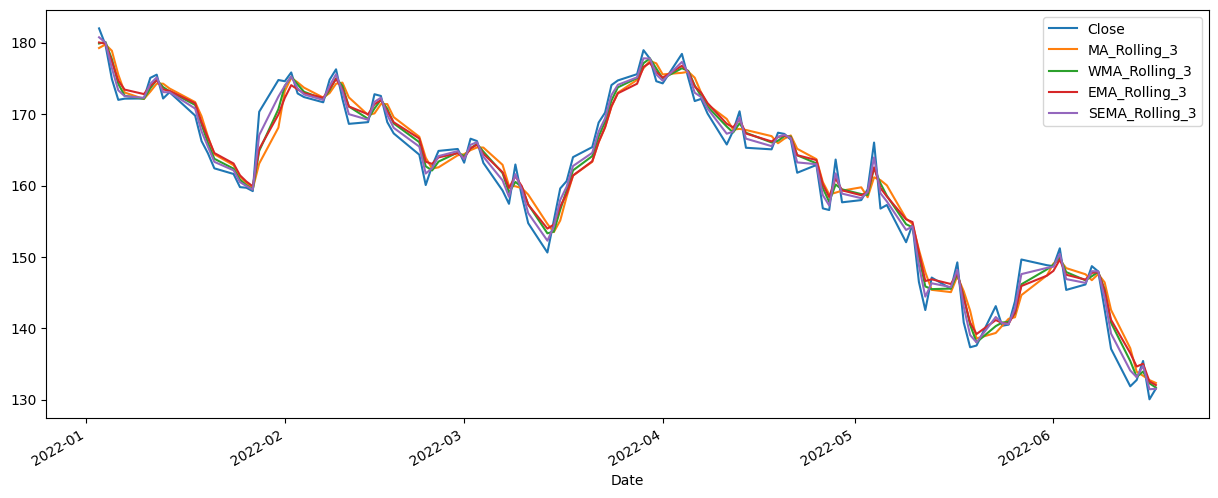

In [97]:
#plotting for a smaller time period to show clear visualization
data_base["2022":"2022"].plot(figsize=(15,6))

In [98]:
#Calculating the RMSE for all the 4 above Moving Average Models
ma_rmse = ((data_base["Close"] - data_base["MA_Rolling_3"]) ** 2).mean()**0.5
print("Simple Moving Average", ma_rmse)

wma_rmse = ((data_base["Close"] - data_base["WMA_Rolling_3"]) ** 2).mean()**0.5
print("Weighted Moving Average", wma_rmse)

ema_rmse = ((data_base["Close"] - data_base["EMA_Rolling_3"]) ** 2).mean()**0.5
print("Exponential Moving Average", ema_rmse)

sema_rmse = ((data_base["Close"] - data_base["SEMA_Rolling_3"]) ** 2).mean()**0.5
print("Exponential Smooething Moving Average", sema_rmse)

Simple Moving Average 0.5054582414169049
Weighted Moving Average 0.3595908001950931
Exponential Moving Average 0.3878858262444068
Exponential Smooething Moving Average 0.2143189249163852


In [99]:
#Model building using deep learning
#Predicting using LSTM
#Splitting the dataset into train and test
#creating a new data frame with only 'Close column'
import math
data2 = data1["1980":"2022"][["Close"]]
#converting the data frame to a numpy array
dataset = data2.values 
training_data_len = math.ceil(len(dataset)*.8)  # selecting 80% of data for training the model 
training_data_len

8375

In [100]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [101]:
#creating the training dataset
train_data = scaled_data[0:training_data_len, :]

#splitting the data into x_train, y_train  
X_train = []
y_train = []

#using the time step = 90 days 
for i in range(90, len(train_data)):
    
    X_train.append(train_data[i-90:i, 0])
    y_train.append(train_data[i,0])

In [102]:
#converting the x_train and y_train into numppy array
X_train, y_train = np.array(X_train), np.array(y_train)

#reshaping the data as LSTM takes 3D array as input (3 input dimensions are: samples, time steps, and features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(8285, 90, 1)

In [45]:
pip install --user tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

2.13.0


In [104]:
#building the LSTM model
model = Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 90, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [105]:
#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [106]:
# training the model
model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
259/259 [==============================] - 30s 96ms/step - loss: 3.2542e-05
Epoch 2/20
259/259 [==============================] - 25s 97ms/step - loss: 2.8087e-06
Epoch 3/20
259/259 [==============================] - 25s 96ms/step - loss: 2.7320e-06
Epoch 4/20
259/259 [==============================] - 24s 94ms/step - loss: 2.5164e-06
Epoch 5/20
259/259 [==============================] - 25s 95ms/step - loss: 2.5150e-06
Epoch 6/20
259/259 [==============================] - 25s 96ms/step - loss: 2.8780e-06
Epoch 7/20
259/259 [==============================] - 25s 97ms/step - loss: 2.1386e-06
Epoch 8/20
259/259 [==============================] - 25s 96ms/step - loss: 2.8673e-06
Epoch 9/20
259/259 [==============================] - 24s 95ms/step - loss: 2.6247e-06
Epoch 10/20
259/259 [==============================] - 26s 99ms/step - loss: 1.8760e-06
Epoch 11/20
259/259 [==============================] - 23s 90ms/step - loss: 1.6228e-06
Epoch 12/20
259/259 [====================

In [107]:
#creating the testing dataset
test_data = scaled_data[training_data_len-90:, :]

#creating the data sets x_test and y_test
X_test = []
y_test = dataset[training_data_len:,:]

for i in range(90, len(test_data)):
    X_test.append(test_data[i-90:i, 0])

In [108]:
test_data

array([[0.09875062],
       [0.09961226],
       [0.10205981],
       ...,
       [0.74401091],
       [0.7144991 ],
       [0.72274263]])

In [109]:
#converting test data into a numpy array
X_test = np.array(X_test)
# reshaping the test data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(2093, 90, 1)

In [110]:
#predicting the data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

66/66 [==============================] - 2s 20ms/step


In [111]:
# Evalutions
from sklearn import metrics
# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(y_test, predictions))
# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(y_test, predictions))
# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#R2 Score
print("R2 Score                : ", metrics.r2_score(y_test, predictions))

Mean Absolute Error     :  3.640307289385727
Mean Squared Error      :  31.761012643174396
Root Mean Squared Error :  5.635690964129811
R2 Score                :  0.9846894298986416


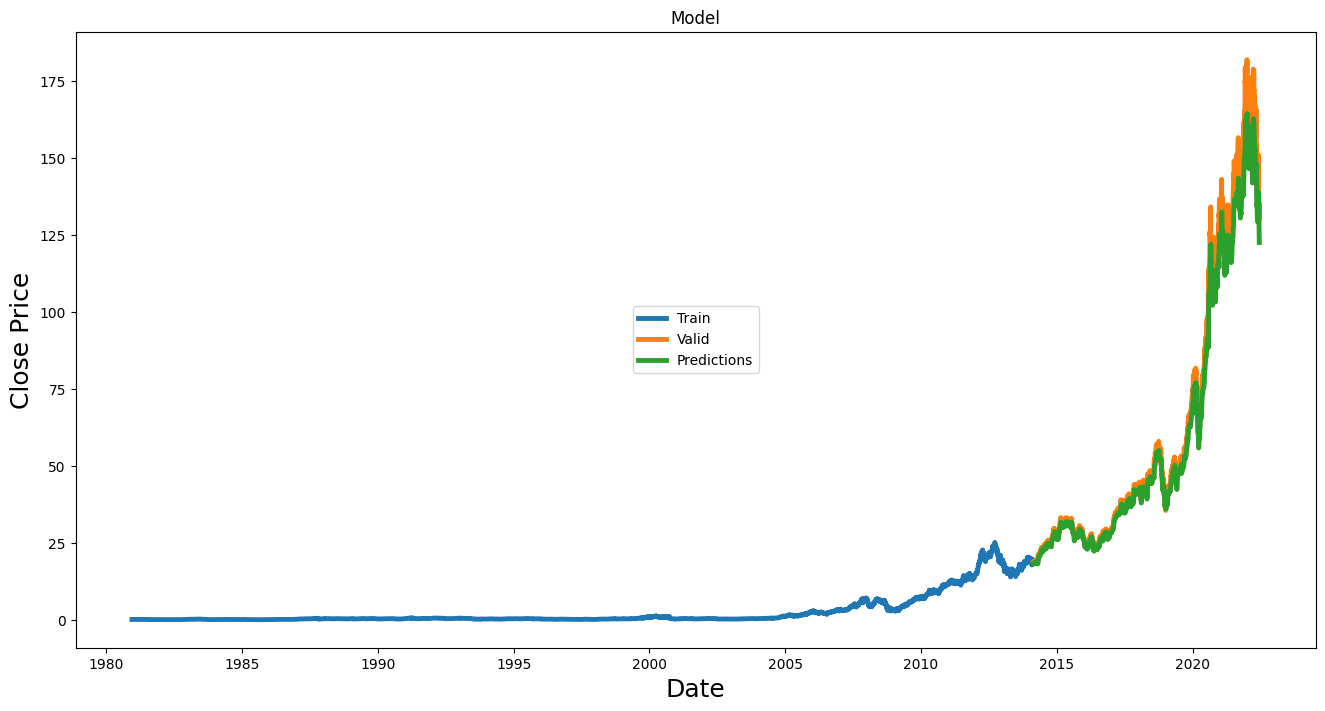

In [112]:
# plotting the data
train = data2[:training_data_len]
valid = data2[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='center')

In [113]:
#showing the valid and predicted price
valid

,Close,Predictions
Date,,
2014-02-27,18.845358,18.196621
2014-02-28,18.794287,18.208641
2014-03-03,18.848572,18.253668
2014-03-04,18.972857,18.316900
2014-03-05,19.012857,18.407513
...,...,...
2022-06-13,131.880005,132.089920
2022-06-14,132.759995,127.893570
2022-06-15,135.429993,124.966537


In [118]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

#Defining the input sequence length and number of features
sequence_length = 30  # Number of previous time steps to consider
n_features = 1  # Only using the 'Close' price as a feature

#Preparing the training data
X_train, y_train = [], []
for i in range(sequence_length, len(train_data)):
    X_train.append(train_data[i-sequence_length:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], n_features))

#Building the CNN model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

#Preparing the testing data
X_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i, 0])
    y_test.append(test_data[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], n_features))

#Making the predictions
Predictions = model.predict(X_test)
Predictions = scaler.inverse_transform(Predictions)

#Evaluating the model
from sklearn import metrics
# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(y_test, Predictions))
# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(y_test, Predictions))
# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, Predictions)))
#R2 Score
print("R2 Score                : ", metrics.r2_score(y_test, Predictions))

Epoch 1/10
261/261 [==============================] - 1s 2ms/step - loss: 1.5298e-05
Epoch 2/10
261/261 [==============================] - 1s 2ms/step - loss: 4.0952e-06
Epoch 3/10
261/261 [==============================] - 1s 2ms/step - loss: 3.0459e-06
Epoch 4/10
261/261 [==============================] - 1s 2ms/step - loss: 2.4695e-06
Epoch 5/10
261/261 [==============================] - 1s 4ms/step - loss: 2.1799e-06
Epoch 6/10
261/261 [==============================] - 1s 4ms/step - loss: 2.0383e-06
Epoch 7/10
261/261 [==============================] - 1s 4ms/step - loss: 2.8562e-06
Epoch 8/10
261/261 [==============================] - 1s 4ms/step - loss: 1.9304e-06
Epoch 9/10
261/261 [==============================] - 1s 4ms/step - loss: 1.9500e-06
Epoch 10/10
68/68 [==============================] - 0s 2ms/step
Mean Absolute Error     :  60.51619375695529
Mean Squared Error      :  5630.314293475046
Root Mean Squared Error :  75.0354202592019
R2 Score                :  -90125.23

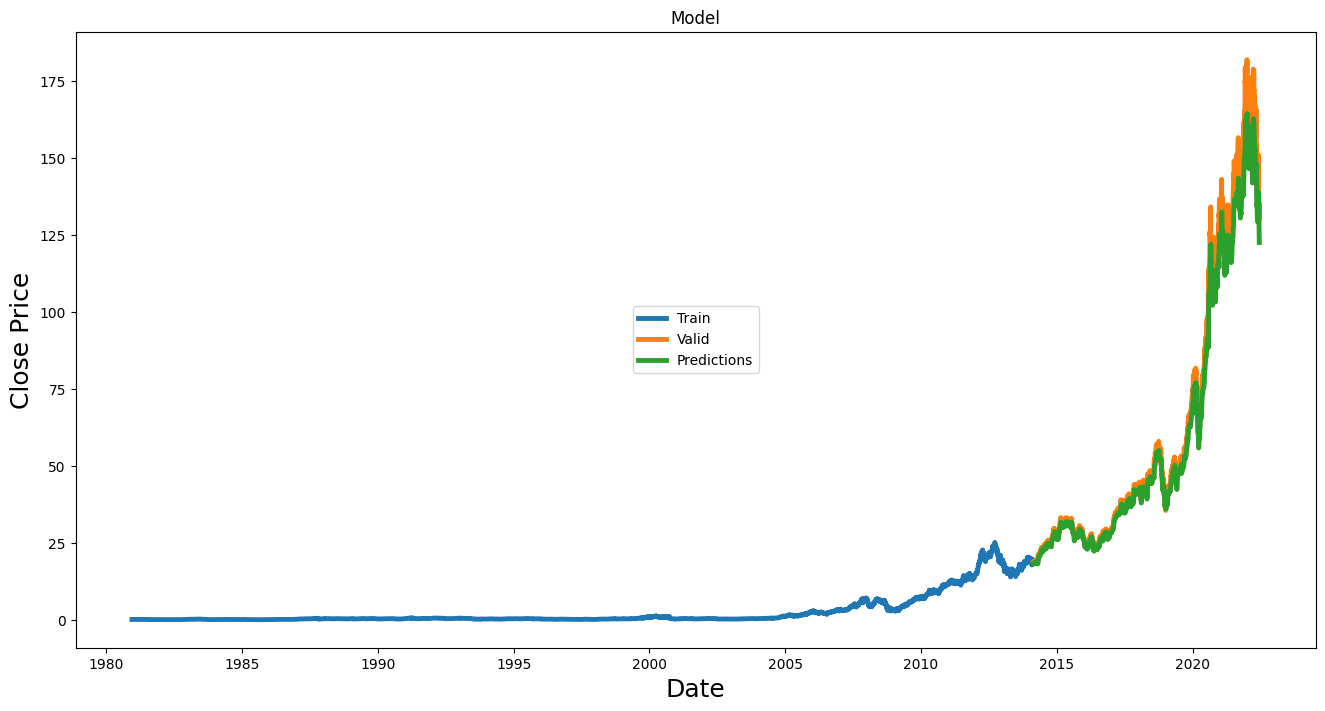

In [120]:
# plotting the data
train = data2[:training_data_len]
valid = data2[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='center')

In [121]:
import pandas as pd
import numpy as np

# Making the predictions
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test_actual.flatten(), 'Predicted': predicted_values.flatten()})

# Display the DataFrame
print(comparison_df)

68/68 [==============================] - 0s 2ms/step
          Actual   Predicted
0      19.859644   18.787992
1      19.686787   19.064919
2      20.225714   19.201902
3      20.178572   19.468536
4      20.282143   19.627073
...          ...         ...
2148  131.880005  142.319122
2149  132.759995  139.407639
2150  135.429993  136.858368
2151  130.059998  135.677048
2152  131.559998  134.468384

[2153 rows x 2 columns]


In [131]:
from tensorflow.keras.layers import GRU, Dense
#Building the GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(sequence_length, n_features)))
model.add(GRU(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

#Making predictions
Predictions = model.predict(X_test)
Predictions = scaler.inverse_transform(Predictions)

Epoch 1/10
261/261 [==============================] - 21s 48ms/step - loss: 2.6436e-05
Epoch 2/10
261/261 [==============================] - 12s 46ms/step - loss: 1.4145e-06
Epoch 3/10
261/261 [==============================] - 12s 46ms/step - loss: 1.1512e-06
Epoch 4/10
261/261 [==============================] - 14s 52ms/step - loss: 1.6041e-06
Epoch 5/10
261/261 [==============================] - 15s 56ms/step - loss: 1.8833e-06
Epoch 6/10
261/261 [==============================] - 12s 46ms/step - loss: 1.5510e-06
Epoch 7/10
261/261 [==============================] - 12s 45ms/step - loss: 1.3787e-06
Epoch 8/10
261/261 [==============================] - 12s 45ms/step - loss: 1.4653e-06
Epoch 9/10
261/261 [==============================] - 12s 48ms/step - loss: 1.6977e-06
Epoch 10/10
68/68 [==============================] - 2s 9ms/step


In [132]:
import pandas as pd
import numpy as np

# ...

y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test_actual.flatten(), 'Predicted': predicted_values.flatten()})

#Evaluating the model
from sklearn import metrics
# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(y_test, predicted_values))
# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(y_test, predicted_values))
# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, predicted_values)))
#R2 Score
print("R2 Score                : ", metrics.r2_score(y_test, predicted_values))
# Display the DataFrame
print(comparison_df)

Mean Absolute Error     :  60.73070478225605
Mean Squared Error      :  5655.321911851568
Root Mean Squared Error :  75.20187439054673
R2 Score                :  -90525.54130114098
          Actual   Predicted
0      19.859644   18.928513
1      19.686787   19.277731
2      20.225714   19.427088
3      20.178572   19.698511
4      20.282143   19.863117
...          ...         ...
2148  131.880005  139.897522
2149  132.759995  135.422043
2150  135.429993  132.917755
2151  130.059998  132.747223
2152  131.559998  130.959961

[2153 rows x 2 columns]


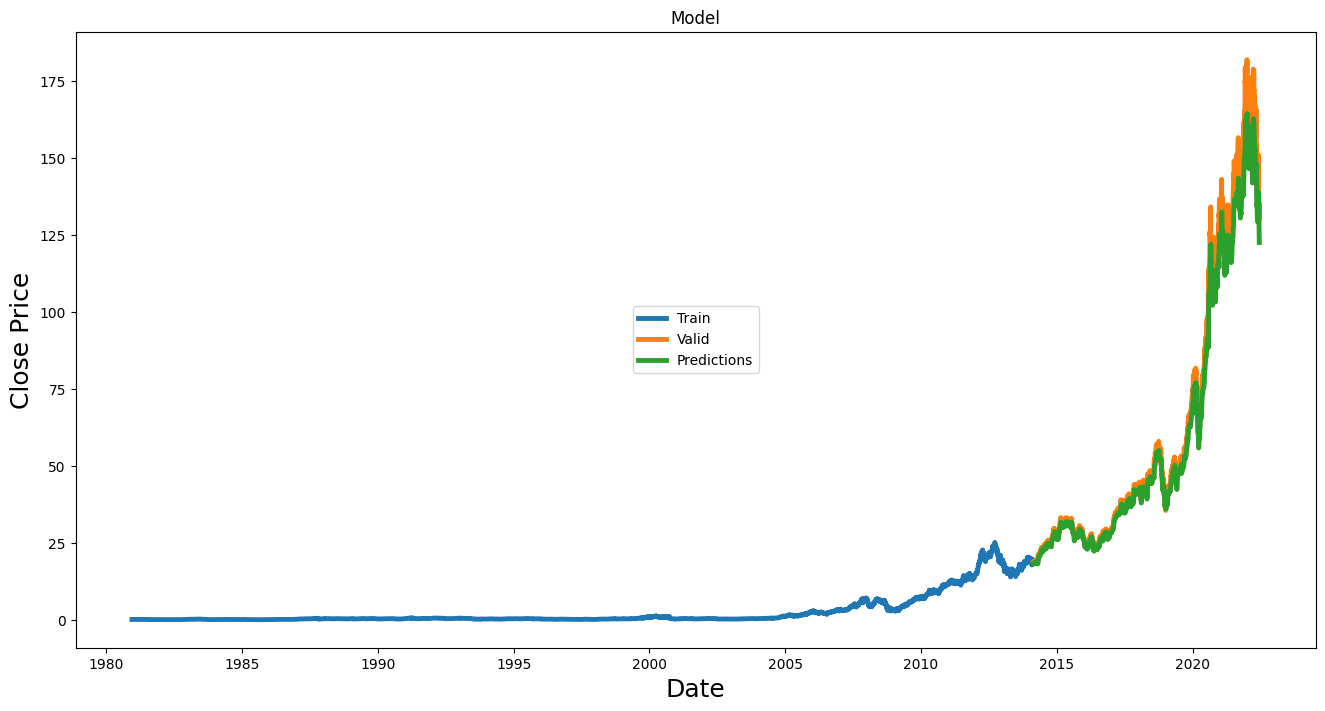

In [133]:
# plotting the data
train = data2[:training_data_len]
valid = data2[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='center')

In [134]:
from tensorflow.keras.layers import SimpleRNN, Dense
# Building the RNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(sequence_length, n_features)))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Making predictions
Predictions = model.predict(X_test)
Predictions = scaler.inverse_transform(Predictions)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test_actual.flatten(), 'Predicted': predicted_values.flatten()})

# Calculate RMSE
#Evaluating the model
from sklearn import metrics
# MAE
print("Mean Absolute Error     : ", metrics.mean_absolute_error(y_test, Predictions))
# MSE
print("Mean Squared Error      : ", metrics.mean_squared_error(y_test, Predictions))
# RMSE
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, Predictions)))
#R2 Score
print("R2 Score                : ", metrics.r2_score(y_test, Predictions))
# Display the DataFrame
print(comparison_df)

Epoch 1/10
261/261 [==============================] - 10s 23ms/step - loss: 8.3748e-05
Epoch 2/10
261/261 [==============================] - 6s 22ms/step - loss: 5.2257e-06
Epoch 3/10
261/261 [==============================] - 5s 20ms/step - loss: 3.9143e-06
Epoch 4/10
261/261 [==============================] - 5s 20ms/step - loss: 1.6963e-06
Epoch 5/10
261/261 [==============================] - 5s 20ms/step - loss: 2.1974e-06
Epoch 6/10
261/261 [==============================] - 5s 21ms/step - loss: 2.0464e-06
Epoch 7/10
261/261 [==============================] - 5s 21ms/step - loss: 1.2556e-06
Epoch 8/10
261/261 [==============================] - 6s 23ms/step - loss: 1.2089e-06
Epoch 9/10
261/261 [==============================] - 5s 20ms/step - loss: 1.6440e-06
Epoch 10/10
68/68 [==============================] - 1s 8ms/step
Mean Absolute Error     :  55.16793606137318
Mean Squared Error      :  4224.631193668895
Root Mean Squared Error :  64.99716296630874
R2 Score                :

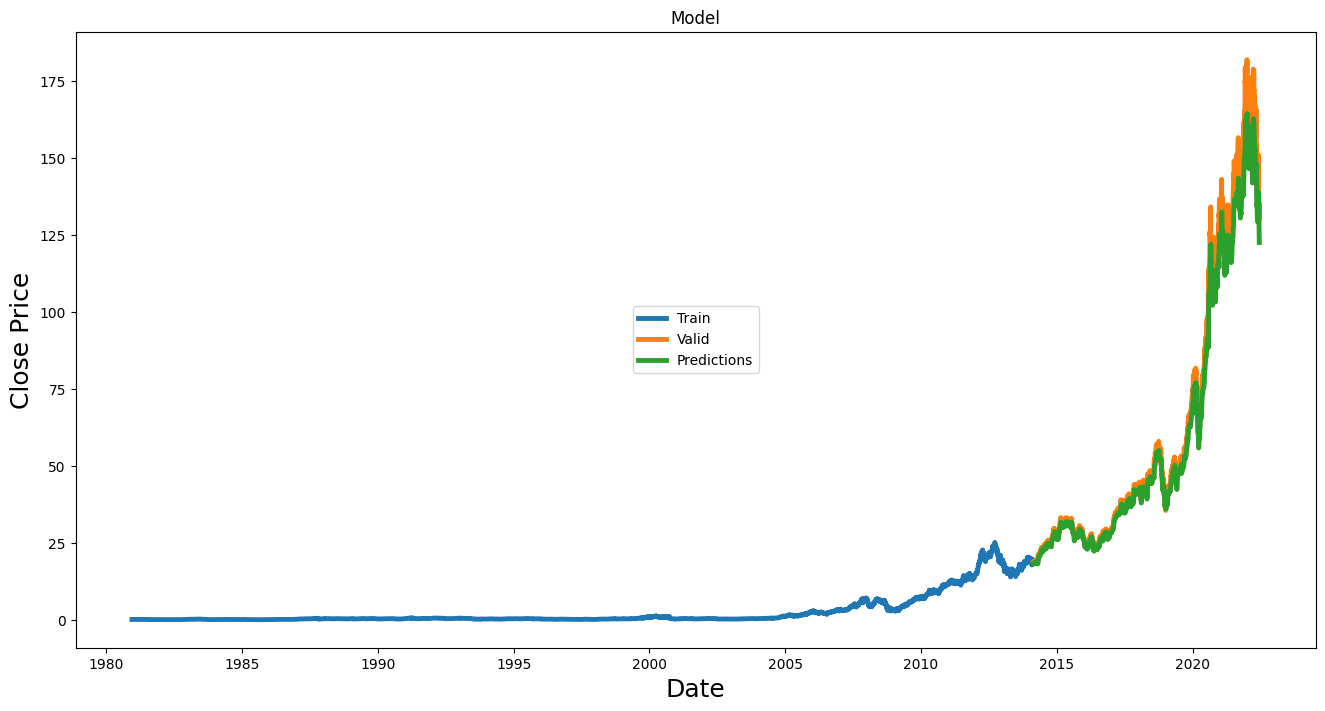

In [135]:
# plotting the data
train = data2[:training_data_len]
valid = data2[training_data_len:]
valid['Predictions'] = predictions

# visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='center')